In [129]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from plotnine import *

### Part 2: 
### Case 1


In [130]:
# Q1
df = pd.read_csv('https://raw.githubusercontent.com/robertasgabrys/Forecasting/main/Nenana1.csv')
df.head()

,Year,Date & Time
0,1917,April 30 at 11:30 AM
1,1918,May 11 at 9:33 AM
2,1919,May 3 at 2:33 PM
3,1920,May 11 at 10:46 AM
4,1921,May 11 at 6:42 AM


### Q2 : KPI

In [131]:
df.dtypes


Year            int64
Date & Time    object
dtype: object

In [132]:
df['Date'] = df['Year'].astype(str) + ' ' + df['Date & Time']
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes


Year                    int64
Date & Time            object
Date           datetime64[ns]
dtype: object

In [133]:
df['Firstday'] = df['Year'].astype(str) + '-01-01'
df['Firstday'] = pd.to_datetime(df['Firstday'])
df['KPI'] = (df['Date'] - df['Firstday']).dt.days
df.head()

,Year,Date & Time,Date,Firstday,KPI
0,1917,April 30 at 11:30 AM,1917-04-30 11:30:00,1917-01-01,119
1,1918,May 11 at 9:33 AM,1918-05-11 09:33:00,1918-01-01,130
2,1919,May 3 at 2:33 PM,1919-05-03 14:33:00,1919-01-01,122
3,1920,May 11 at 10:46 AM,1920-05-11 10:46:00,1920-01-01,131
4,1921,May 11 at 6:42 AM,1921-05-11 06:42:00,1921-01-01,130


### Q3. Create a graph of KPI

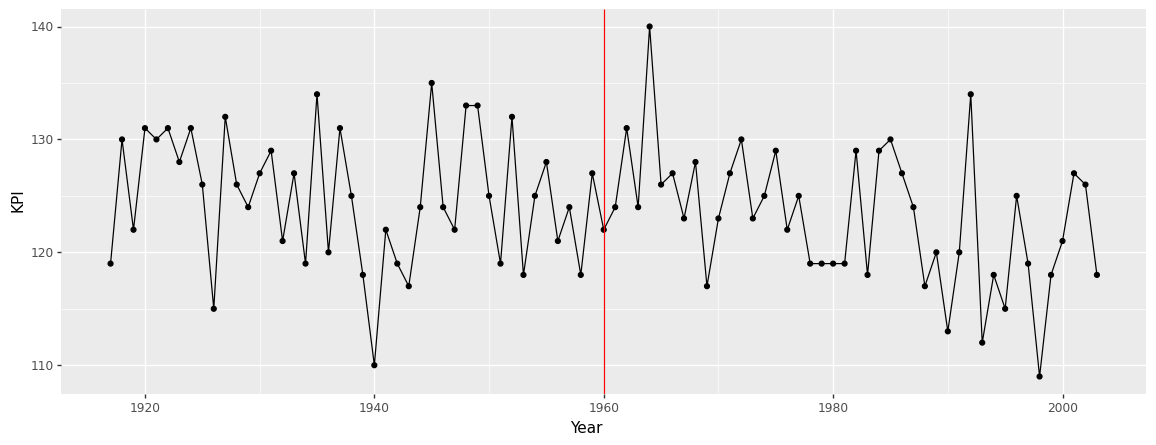

<ggplot: (125679272831)>

In [134]:
(
   ggplot(df,aes('Year','KPI')) + geom_point() + geom_line() 
   + geom_vline(xintercept = 1960, color='red')
   + theme(figure_size=(14,5))
)

In [135]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [136]:
df['Trend'] = range(1,88)
df.head()

,Year,Date & Time,Date,Firstday,KPI,Trend
0,1917,April 30 at 11:30 AM,1917-04-30 11:30:00,1917-01-01,119,1
1,1918,May 11 at 9:33 AM,1918-05-11 09:33:00,1918-01-01,130,2
2,1919,May 3 at 2:33 PM,1919-05-03 14:33:00,1919-01-01,122,3
3,1920,May 11 at 10:46 AM,1920-05-11 10:46:00,1920-01-01,131,4
4,1921,May 11 at 6:42 AM,1921-05-11 06:42:00,1921-01-01,130,5


In [137]:
M = smf.ols('KPI ~ Trend', data=df).fit()
print(M.summary())

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     7.470
Date:                Mon, 12 Sep 2022   Prob (F-statistic):            0.00763
Time:                        14:56:03   Log-Likelihood:                -274.64
No. Observations:                  87   AIC:                             553.3
Df Residuals:                      85   BIC:                             558.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    126.8952      1.244    102.012      0.0

In [138]:
df['M'] = M.fittedvalues

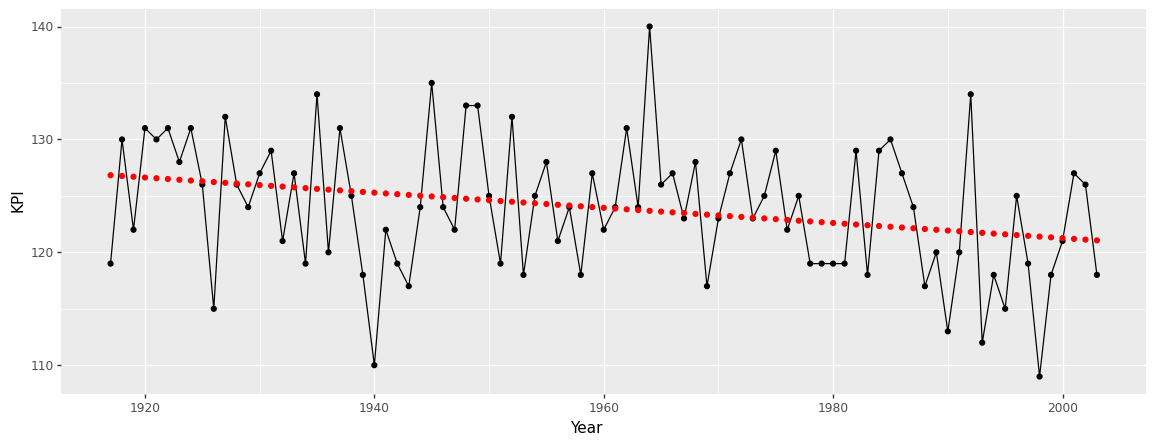

<ggplot: (125679274216)>

In [139]:
(
   ggplot(df,aes('Year','KPI')) + geom_point() + geom_line() 
   + geom_point(aes('Year','M'), color='Red')    
   + theme(figure_size=(14,5))
)

In [140]:
df.head()

,Year,Date & Time,Date,Firstday,KPI,Trend,M
0,1917,April 30 at 11:30 AM,1917-04-30 11:30:00,1917-01-01,119,1,126.828109
1,1918,May 11 at 9:33 AM,1918-05-11 09:33:00,1918-01-01,130,2,126.761002
2,1919,May 3 at 2:33 PM,1919-05-03 14:33:00,1919-01-01,122,3,126.693896
3,1920,May 11 at 10:46 AM,1920-05-11 10:46:00,1920-01-01,131,4,126.626789
4,1921,May 11 at 6:42 AM,1921-05-11 06:42:00,1921-01-01,130,5,126.559683


### Q4 : Assessing the significance in the abrupt change in KPI

In [141]:
df[df.Year == 1960]

,Year,Date & Time,Date,Firstday,KPI,Trend,M
43,1960,May 2 at 7:12 PM,1960-05-02 19:12:00,1960-01-01,122,44,123.942529


In [142]:
df['BM'] = 0
df.loc[43:, 'BM'] = 1

In [143]:
# build a regresssion model to assess abrupt change

M1 = smf.ols('KPI~BM', data=df).fit()
print(M1.summary())

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.369
Date:                Mon, 12 Sep 2022   Prob (F-statistic):              0.127
Time:                        14:56:04   Log-Likelihood:                -277.10
No. Observations:                  87   AIC:                             558.2
Df Residuals:                      85   BIC:                             563.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.9302      0.902    138.456      0.0

In [144]:
M1.pvalues[1] / 2  # one sided p-value

0.06373108025635693

P-value is larger than the significant level (0.05). Thus, we cannot say that there is a statistically significant difference between these two periods.
There was no abrupt change in KPI.

### Q5 : Does data provide statistically significant evidence of global warming? 
Answer this question by assessing the significance in the abrupt change in KPI.

Since BM variable's p-value(0.063) is larger than the significance level (0.05), we cannot say that there was abrupt change in KPI.

In [145]:
df['M1'] = M1.fittedvalues
df.head()

,Year,Date & Time,Date,Firstday,KPI,Trend,M,BM,M1
0,1917,April 30 at 11:30 AM,1917-04-30 11:30:00,1917-01-01,119,1,126.828109,0,124.930233
1,1918,May 11 at 9:33 AM,1918-05-11 09:33:00,1918-01-01,130,2,126.761002,0,124.930233
2,1919,May 3 at 2:33 PM,1919-05-03 14:33:00,1919-01-01,122,3,126.693896,0,124.930233
3,1920,May 11 at 10:46 AM,1920-05-11 10:46:00,1920-01-01,131,4,126.626789,0,124.930233
4,1921,May 11 at 6:42 AM,1921-05-11 06:42:00,1921-01-01,130,5,126.559683,0,124.930233


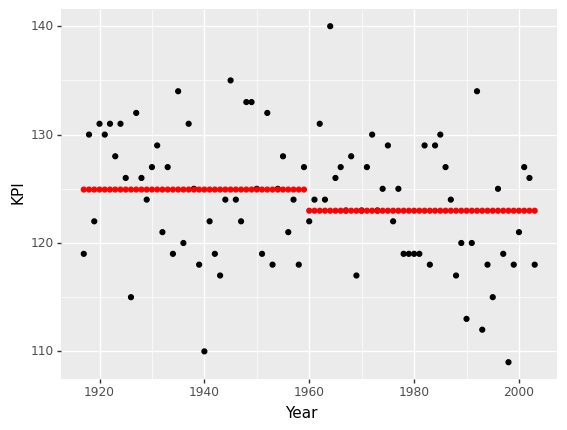

<ggplot: (125679300843)>

In [146]:
(
    ggplot(df, aes('Year', 'KPI'))
    + geom_point()
    + geom_point(aes('Year', 'M1'), color='red')
)

## Gradual change

In [147]:
df['Ramp'] = 0
df.loc[43:, 'Ramp'] = list(range(1,45))

In [148]:
df[df.Year == 1960]

,Year,Date & Time,Date,Firstday,KPI,Trend,M,BM,M1,Ramp
43,1960,May 2 at 7:12 PM,1960-05-02 19:12:00,1960-01-01,122,44,123.942529,1,122.977273,1


In [149]:
# build a regresssion model to assess gradual change
M2 = smf.ols('KPI ~ BM + Ramp', data=df).fit()
print(M2.summary())

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     5.339
Date:                Mon, 12 Sep 2022   Prob (F-statistic):            0.00656
Time:                        14:56:05   Log-Likelihood:                -273.10
No. Observations:                  87   AIC:                             552.2
Df Residuals:                      84   BIC:                             559.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.9302      0.867    144.131      0.0

In [150]:
# BM is not significant, while Ramp is significant:
M2.pvalues[2] / 2

0.00276526124220351

In [151]:
# On average, KPI decreased by 0.192 each year

In [152]:
df['M2'] = M2.fittedvalues
df.tail()

,Year,Date & Time,Date,Firstday,KPI,Trend,M,BM,M1,Ramp,M2
82,1999,April 29 at 9:47 PM,1999-04-29 21:47:00,1999-01-01,118,83,121.325375,1,122.977273,40,119.614165
83,2000,May 1 at 10:47 AM,2000-05-01 10:47:00,2000-01-01,121,84,121.258268,1,122.977273,41,119.421987
84,2001,May 8 at 1:00 PM,2001-05-08 13:00:00,2001-01-01,127,85,121.191162,1,122.977273,42,119.229810
85,2002,May 7 at 9:27 PM,2002-05-07 21:27:00,2002-01-01,126,86,121.124055,1,122.977273,43,119.037632
86,2003,April 29 at 6:22 PM,2003-04-29 18:22:00,2003-01-01,118,87,121.056949,1,122.977273,44,118.845455


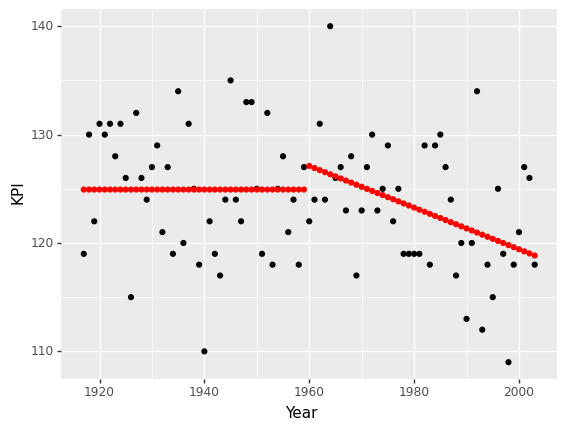

<ggplot: (125679318522)>

In [153]:
(
    ggplot(df, aes('Year', 'KPI')) + geom_point()
    + geom_point(aes('Year', 'M2'), color='red')
)

In [154]:
# build a regresssion model to assess only gradual intervention
M3 = smf.ols('KPI ~ Ramp', data=df).fit()
print(M3.summary())

# Interpretation : After 1960, the KPI decreased by 0.1281 each year on average
# the gradual change is statistically significant enough. (p-value is smaller than significance levels)

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     9.143
Date:                Mon, 12 Sep 2022   Prob (F-statistic):            0.00330
Time:                        14:56:06   Log-Likelihood:                -273.86
No. Observations:                  87   AIC:                             551.7
Df Residuals:                      85   BIC:                             556.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.4002      0.778    161.111      0.0

In [155]:
df['M3'] = M3.fittedvalues

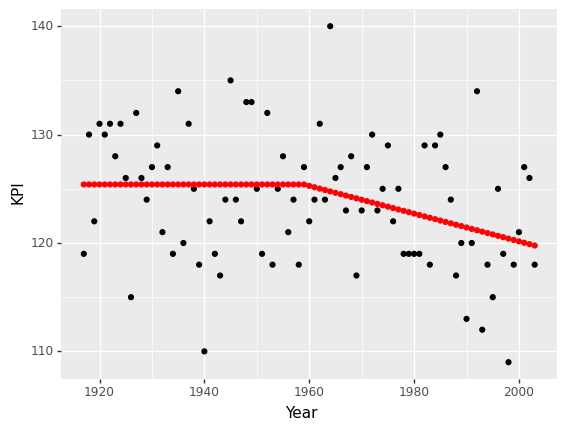

<ggplot: (125677288741)>

In [156]:
(
    ggplot(df, aes('Year', 'KPI')) + geom_point()
    + geom_point(aes('Year', 'M3'), color='red')
)

In [157]:
# let's assess whether the slope of a line before intervention is statistically siginificant different from 0

M = smf.ols('KPI ~ Trend', data=df.iloc[0:43,]).fit()
print(M.summary())

# no reason that the period has some statistically meaningful difference

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9929
Date:                Mon, 12 Sep 2022   Prob (F-statistic):              0.325
Time:                        14:56:06   Log-Likelihood:                -135.64
No. Observations:                  43   AIC:                             275.3
Df Residuals:                      41   BIC:                             278.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    126.4950      1.803     70.161      0.0

## Q6 : Which one – abrupt or gradual effect of the intervention in 1960 is more appropriate?

Gradual effect of the intervention in 1960 is more appropriate.
When we compared the different 2 periods, there was no significant difference between the means of KPI.
However, when we use Ramp variable, we could find a significant difference in the relation of Ramp and KPI. 

In [158]:
# Q10
df_new = pd.read_csv('https://raw.githubusercontent.com/robertasgabrys/Forecasting/main/Nenana2.csv')
df_new.tail()

,Year,Date & Time
100,2017,May 1 at 12:00 PM
101,2018,May 1 at 1:18 PM
102,2019,April 14 at 12:21 AM
103,2020,April 27 at 12:56 PM
104,2021,April 30 at 12:50 PM


In [159]:
df_new['Date'] = df_new['Year'].astype(str) + ' ' + df_new['Date & Time']
df_new['Date'] = pd.to_datetime(df_new['Date'])


In [160]:
df_new['Firstday'] = df_new['Year'].astype(str) + '-01-01'
df_new['Firstday'] = pd.to_datetime(df_new['Firstday'])
df_new['KPI'] = (df_new['Date'] - df_new['Firstday']).dt.days
df_new.head()

,Year,Date & Time,Date,Firstday,KPI
0,1917,April 30 at 11:30 AM,1917-04-30 11:30:00,1917-01-01,119
1,1918,May 11 at 9:33 AM,1918-05-11 09:33:00,1918-01-01,130
2,1919,May 3 at 2:33 PM,1919-05-03 14:33:00,1919-01-01,122
3,1920,May 11 at 10:46 AM,1920-05-11 10:46:00,1920-01-01,131
4,1921,May 11 at 6:42 AM,1921-05-11 06:42:00,1921-01-01,130


In [161]:
df_new.drop(['Date & Time'], axis=1, inplace=True)

In [162]:
df_new.head()

,Year,Date,Firstday,KPI
0,1917,1917-04-30 11:30:00,1917-01-01,119
1,1918,1918-05-11 09:33:00,1918-01-01,130
2,1919,1919-05-03 14:33:00,1919-01-01,122
3,1920,1920-05-11 10:46:00,1920-01-01,131
4,1921,1921-05-11 06:42:00,1921-01-01,130


In [163]:
df_new[df_new.Year == 1960]


,Year,Date,Firstday,KPI
43,1960,1960-05-02 19:12:00,1960-01-01,122


### Abrupt Change

In [164]:
df_new['BM'] = 0
df_new.loc[43:, 'BM'] = 1

In [165]:
df_new.tail()

,Year,Date,Firstday,KPI,BM
100,2017,2017-05-01 12:00:00,2017-01-01,120,1
101,2018,2018-05-01 13:18:00,2018-01-01,120,1
102,2019,2019-04-14 00:21:00,2019-01-01,103,1
103,2020,2020-04-27 12:56:00,2020-01-01,117,1
104,2021,2021-04-30 12:50:00,2021-01-01,119,1


In [166]:
# build a regresssion model to assess abrupt change

M1_new = smf.ols('KPI~BM', data=df_new).fit()
print(M1_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     7.108
Date:                Mon, 12 Sep 2022   Prob (F-statistic):            0.00891
Time:                        14:56:07   Log-Likelihood:                -342.25
No. Observations:                 105   AIC:                             688.5
Df Residuals:                     103   BIC:                             693.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.9302      0.970    128.782      0.0

In [167]:
M1_new.pvalues[1] / 2  # one sided p-value

0.004456604527011816

Statistically significance difference between two periods (BM's P-value is lower than significance level 0.05). There was an abrupt change in KPI after 1960.


In [168]:
df_new['M1_new'] = M1_new.fittedvalues
df_new.head()

,Year,Date,Firstday,KPI,BM,M1_new
0,1917,1917-04-30 11:30:00,1917-01-01,119,0,124.930233
1,1918,1918-05-11 09:33:00,1918-01-01,130,0,124.930233
2,1919,1919-05-03 14:33:00,1919-01-01,122,0,124.930233
3,1920,1920-05-11 10:46:00,1920-01-01,131,0,124.930233
4,1921,1921-05-11 06:42:00,1921-01-01,130,0,124.930233


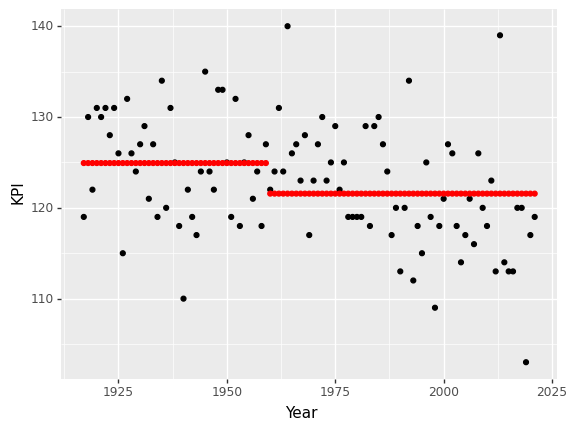

<ggplot: (125677170047)>

In [169]:
(
    ggplot(df_new, aes('Year', 'KPI'))
    + geom_point()
    + geom_point(aes('Year', 'M1_new'), color='red')
)

### Gradual Change

In [170]:
df_new['Ramp'] = 0
df_new.loc[43:, 'Ramp'] = list(range(1, len(df_new) - 42))


In [171]:
# build a regresssion model to assess only gradual intervention
M3_new = smf.ols('KPI ~ Ramp', data=df_new).fit()
print(M3_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     23.43
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           4.56e-06
Time:                        14:56:08   Log-Likelihood:                -335.00
No. Observations:                 105   AIC:                             674.0
Df Residuals:                     103   BIC:                             679.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.4612      0.779    161.130      0.0

In [172]:
# Interpretation : After 1960, the KPI decreased by 0.1281 each year on average
# the gradual change is statistically significant enough. (p-value is smaller than significance levels)

In [173]:
df_new['M3_new'] = M3_new.fittedvalues

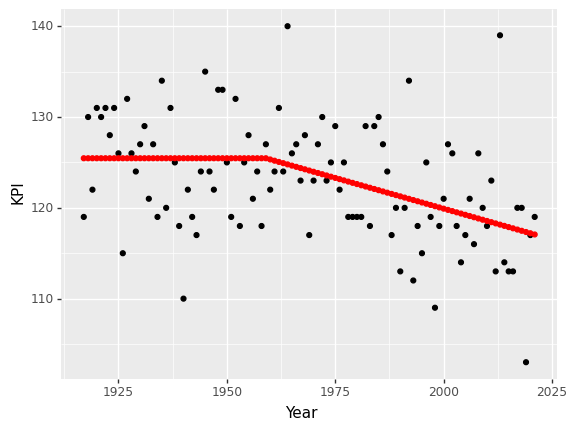

<ggplot: (125678736460)>

In [174]:
(
    ggplot(df_new, aes('Year', 'KPI')) + geom_point()
    + geom_point(aes('Year', 'M3_new'), color='red')
)

## CASE2

In [204]:
#Q1.Import data. Prepare data for analysis and modeling.

df2 = pd.read_csv('https://raw.githubusercontent.com/robertasgabrys/Forecasting/main/dtwnLAozone.csv', index_col=[0],skiprows=1)
df2.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
NaN,Jan.,Feb.,Mar.,Apr.,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.
1955.0,2.63,1.94,3.38,4.92,6.29,5.58,5.5,4.71,6.04,7.13,7.79,3.83
1956.0,3.83,4.25,5.29,3.75,4.67,5.42,6.04,5.71,8.13,4.88,5.42,5.5
1957.0,3,3.42,4.5,4.25,4,5.33,5.79,6.58,7.29,5.04,5.04,4.48
1958.0,3.33,2.88,2.5,3.83,4.17,4.42,4.25,4.08,4.88,4.54,4.25,4.21


In [205]:
df2 = df2.rename(columns=df2.iloc[0])
df2.drop(df2.index[0],inplace=True)

In [206]:
df2.head()

,Jan.,Feb.,Mar.,Apr.,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.
1955.0,2.63,1.94,3.38,4.92,6.29,5.58,5.5,4.71,6.04,7.13,7.79,3.83
1956.0,3.83,4.25,5.29,3.75,4.67,5.42,6.04,5.71,8.13,4.88,5.42,5.5
1957.0,3,3.42,4.5,4.25,4,5.33,5.79,6.58,7.29,5.04,5.04,4.48
1958.0,3.33,2.88,2.5,3.83,4.17,4.42,4.25,4.08,4.88,4.54,4.25,4.21
1959.0,2.75,2.42,4.5,5.21,4,7.54,7.38,5.96,5.08,5.46,4.79,2.67


In [207]:
pr_m = pd.period_range(start='1955-01-01', end = '1972-12-01',freq='M')
pr_m 

PeriodIndex(['1955-01', '1955-02', '1955-03', '1955-04', '1955-05', '1955-06',
             '1955-07', '1955-08', '1955-09', '1955-10',
             ...
             '1972-03', '1972-04', '1972-05', '1972-06', '1972-07', '1972-08',
             '1972-09', '1972-10', '1972-11', '1972-12'],
            dtype='period[M]', length=216)

In [208]:
import_data = []
for a in range(len(df2)):
    for b in range(12):
        import_data.append(float(df2.iloc[a,b]))
print(import_data)

[2.63, 1.94, 3.38, 4.92, 6.29, 5.58, 5.5, 4.71, 6.04, 7.13, 7.79, 3.83, 3.83, 4.25, 5.29, 3.75, 4.67, 5.42, 6.04, 5.71, 8.13, 4.88, 5.42, 5.5, 3.0, 3.42, 4.5, 4.25, 4.0, 5.33, 5.79, 6.58, 7.29, 5.04, 5.04, 4.48, 3.33, 2.88, 2.5, 3.83, 4.17, 4.42, 4.25, 4.08, 4.88, 4.54, 4.25, 4.21, 2.75, 2.42, 4.5, 5.21, 4.0, 7.54, 7.38, 5.96, 5.08, 5.46, 4.79, 2.67, 1.71, 1.92, 3.38, 3.98, 4.63, 4.88, 5.17, 4.83, 5.29, 3.71, 2.46, 2.17, 2.15, 2.44, 2.54, 3.25, 2.81, 4.21, 4.13, 4.17, 3.75, 3.83, 2.42, 2.17, 2.33, 2.0, 2.13, 4.46, 3.17, 3.25, 4.08, 5.42, 4.5, 4.88, 2.83, 2.75, 1.63, 3.04, 2.58, 2.92, 3.29, 3.71, 4.88, 4.63, 4.83, 3.42, 2.38, 2.33, 1.5, 2.25, 2.63, 2.96, 3.46, 4.33, 5.42, 4.79, 4.38, 4.54, 2.04, 1.33, 2.04, 2.81, 2.67, 4.08, 3.9, 3.96, 4.5, 5.58, 4.52, 5.88, 3.67, 1.79, 1.71, 1.92, 3.58, 4.4, 3.79, 5.52, 5.5, 5.0, 5.48, 4.81, 2.42, 1.46, 1.71, 2.46, 2.42, 1.79, 3.63, 3.54, 4.88, 4.96, 3.63, 5.46, 3.08, 1.75, 2.13, 2.58, 2.75, 3.15, 3.46, 3.33, 4.67, 4.13, 4.73, 3.42, 3.08, 1.79, 1.96, 1

In [209]:
df2 = pd.DataFrame({'Date':pr_m})
df2['Ozone'] = import_data
df2.set_index('Date', inplace=True)
df2.head()

,Ozone
Date,
1955-01,2.63
1955-02,1.94
1955-03,3.38
1955-04,4.92
1955-05,6.29


In [210]:
df2['Year'] = df2.index.year
df2['Month'] = df2.index.month
df2['Time'] = list(range(1, len(df2)+1))
df2 = df2.reset_index()
df2.tail()

,Date,Ozone,Year,Month,Time
211,1972-08,3.92,1972,8,212
212,1972-09,3.08,1972,9,213
213,1972-10,2.00,1972,10,214
214,1972-11,1.58,1972,11,215
215,1972-12,1.21,1972,12,216


In [213]:
df2.Time[df2.Date == '1960-01']

60    61
Name: Time, dtype: int64

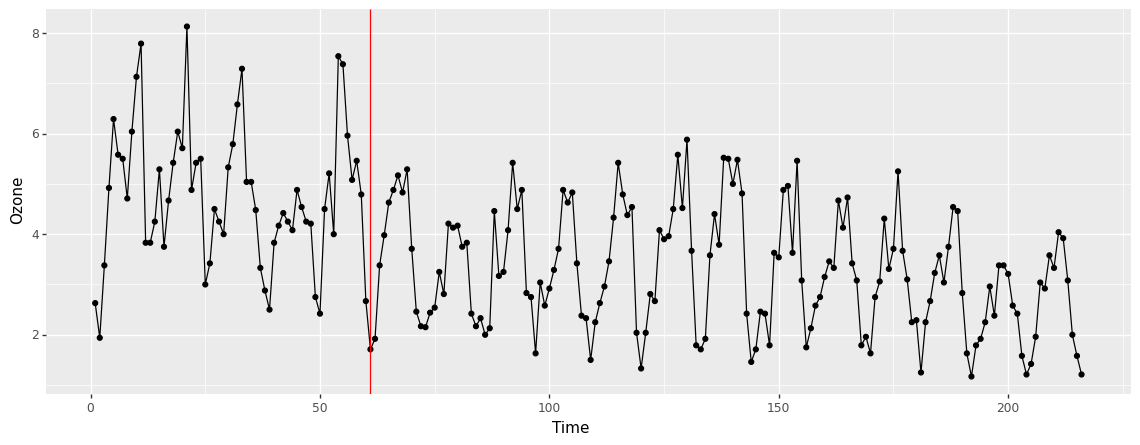

<ggplot: (125679973072)>

In [216]:
# Q2.Graph the data and describe the patterns you see in the data set?

(
    ggplot(df2,aes('Time','Ozone')) +
    geom_point() + geom_line() + 
    geom_vline(xintercept = df2.Time[df2.Date == '1960-01'], color = 'red')+ 
    theme(figure_size=(14,5))
)

Q3. Evaluate both the abrupt and the gradual changes of 1960 intervention

In [218]:
# Abrupt change
df2[df2.Date == '1960-01']

,Date,Ozone,Year,Month,Time
60,1960-01,1.71,1960,1,61


In [220]:
df2['BM'] = 0
df2.loc[60:, 'BM'] = 1

In [221]:
# build a regresssion model to assess abrupt change

M1_c2 = smf.ols('Ozone~BM', data=df2).fit()
print(M1_c2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     66.35
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           3.12e-14
Time:                        15:16:33   Log-Likelihood:                -351.94
No. Observations:                 216   AIC:                             707.9
Df Residuals:                     214   BIC:                             714.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7742      0.160     29.824      0.0

In [222]:
M1_c2.pvalues[1] / 2

1.558549654335231e-14

In [223]:
df2['M1'] = M1_c2.fittedvalues
df2.head()

,Date,Ozone,Year,Month,Time,BM,M1
0,1955-01,2.63,1955,1,1,0,4.774167
1,1955-02,1.94,1955,2,2,0,4.774167
2,1955-03,3.38,1955,3,3,0,4.774167
3,1955-04,4.92,1955,4,4,0,4.774167
4,1955-05,6.29,1955,5,5,0,4.774167


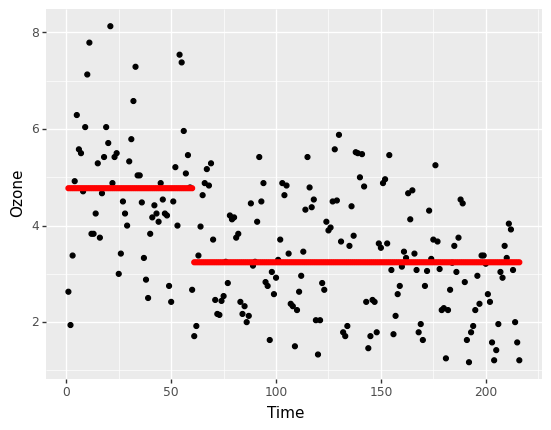

<ggplot: (125677217952)>

In [225]:
(
    ggplot(df2, aes('Time', 'Ozone'))
    + geom_point()
    + geom_point(aes('Time', 'M1'), color='red')
)

In [226]:
# Gradual Change

df2['Ramp'] = 0
df2.loc[60:, 'Ramp'] = list(range(1,len(df2)-59))

In [231]:
df2.loc[df2.Date >= '1960-01']

,Date,Ozone,Year,Month,Time,BM,M1,Ramp
60,1960-01,1.71,1960,1,61,1,3.239872,1
61,1960-02,1.92,1960,2,62,1,3.239872,2
62,1960-03,3.38,1960,3,63,1,3.239872,3
63,1960-04,3.98,1960,4,64,1,3.239872,4
64,1960-05,4.63,1960,5,65,1,3.239872,5
...,...,...,...,...,...,...,...,...
211,1972-08,3.92,1972,8,212,1,3.239872,152
212,1972-09,3.08,1972,9,213,1,3.239872,153
213,1972-10,2.00,1972,10,214,1,3.239872,154
214,1972-11,1.58,1972,11,215,1,3.239872,155


In [232]:
# build a regresssion model to assess gradual change
M2_c2 = smf.ols('Ozone ~ Ramp', data=df2).fit()
print(M2_c2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     52.16
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           8.82e-12
Time:                        15:22:25   Log-Likelihood:                -357.55
No. Observations:                 216   AIC:                             719.1
Df Residuals:                     214   BIC:                             725.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3483      0.128     33.934      0.0

In [233]:
M2_c2.pvalues[1] / 2

4.410574547418608e-12

In [234]:
df2['M2'] = M2_c2.fittedvalues
df2.tail()

,Date,Ozone,Year,Month,Time,BM,M1,Ramp,M2
211,1972-08,3.92,1972,8,212,1,3.239872,152,2.519209
212,1972-09,3.08,1972,9,213,1,3.239872,153,2.507176
213,1972-10,2.00,1972,10,214,1,3.239872,154,2.495142
214,1972-11,1.58,1972,11,215,1,3.239872,155,2.483109
215,1972-12,1.21,1972,12,216,1,3.239872,156,2.471075


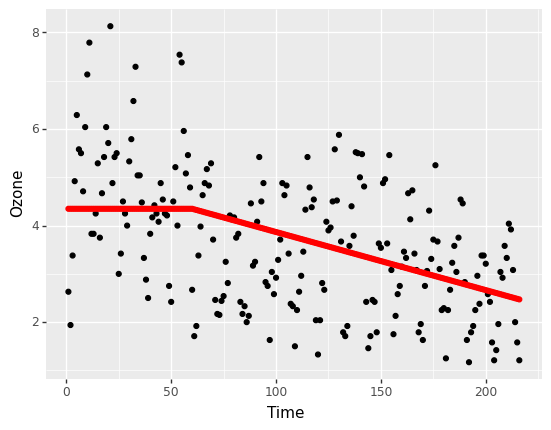

<ggplot: (125678933095)>

In [235]:
(
    ggplot(df2, aes('Time', 'Ozone'))
    + geom_point()
    + geom_point(aes('Time', 'M2'), color='red')
)